TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

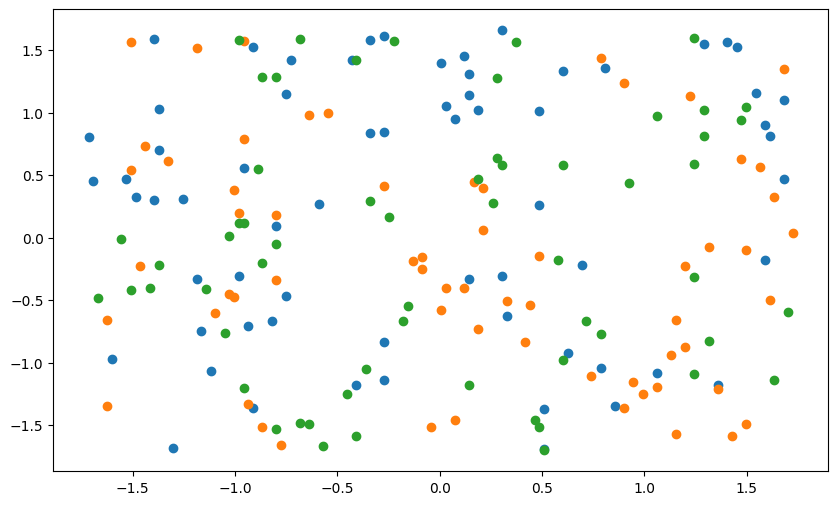

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Chargement des données
data = pd.read_csv("student_admission_dataset.csv")

# Sélection de deux caractéristiques pour la visualisation
feature1 = 0  # Index de la première caractéristique à visualiser
feature2 = 1  # Index de la deuxième caractéristique à visualiser

# Séparation des variables indépendantes (X) et dépendantes (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Mise à l'échelle des fonctionnalités
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle SVM
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train[:, [feature1, feature2]], y_train)

# Affichage de la frontière de décision et des points de données
plt.figure(figsize=(10, 6))

# Tracer les points de données pour chaque classe
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label, feature1], X_train[y_train == label, feature2], label=label)

# Création d'une grille pour évaluer le modèle
xx, yy = np.meshgrid(np.linspace(X_train[:, feature1].min(), X_train[:, feature1].max(), 100),
                     np.linspace(X_train[:, feature2].min(), X_train[:, feature2].max(), 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Affichage de la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel(data.columns[feature1])
plt.ylabel(data.columns[feature2])
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

